In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [2]:
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

In [3]:
def normalize(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

#X = normalize(X)
#Xtest = normalize(Xtest)

In [4]:
col = np.ones(X.shape[0])
X = np.column_stack((col, X))
col = np.ones(Xtest.shape[0])
Xtest = np.column_stack((col, Xtest))

In [5]:
def learnOLERegression(X,y):
    alpha = 1
    itr = 100000
    m = y.size
    w = np.zeros((65,1))
    cost_lst = []
    tol = 1000
    #cost = 100000
    
    for i in range(itr):
    #while cost>tol:
        y_pred = np.dot(X, w)
        cost = (1/(2*m))*np.sum(np.square(y_pred-y))
        dw = (1/m)*np.dot(X.T, y_pred-y)
        w = w - alpha*dw
        cost_lst.append(cost)
    return w, cost_lst

In [6]:
weights, cost_lst = learnOLERegression(X,y)

In [7]:
def testOLERegression(w,Xtest,ytest):
    m = ytest.size
    mse = (1/m)*np.sum(np.square(ytest - np.dot(Xtest,w)))
    return mse

In [8]:
mse = testOLERegression(weights,Xtest,ytest)

In [9]:
print(mse)

90976.42992710235


In [10]:
result = np.dot(X, weights)
result.shape

(242, 1)

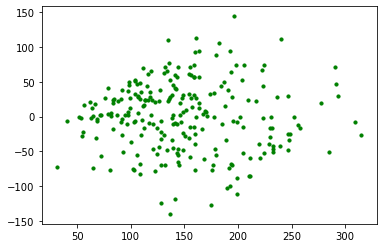

In [11]:
## plotting residual errors
plt.scatter(result, result - y,
            color = "green", s = 10, label = 'Train data')
 
